<a href="https://colab.research.google.com/github/mithun-martin/SEIZURE-PREDICTION-LSTM/blob/main/EEG_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🛠️ Installing MNE...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 40.7 MB/s eta 0:00:00

⬇️ PHASE 1: DOWNLOADING DATA...

🚀 PHASE 2: EXTRACTING RAW SEQUENCES...
  Processing chb01_03.edf...


/tmp/ipython-input-2847895642.py:74: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(os.path.join(EDF_FOLDER, file_name), preload=True, verbose=False)


     -> Extracted 188 sequences.
  Processing chb03_01.edf...


/tmp/ipython-input-2847895642.py:74: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(os.path.join(EDF_FOLDER, file_name), preload=True, verbose=False)


     -> Extracted 191 sequences.
  Processing chb01_04.edf...


/tmp/ipython-input-2847895642.py:74: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(os.path.join(EDF_FOLDER, file_name), preload=True, verbose=False)


     -> Extracted 186 sequences.
  Processing chb02_16.edf...


/tmp/ipython-input-2847895642.py:74: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(os.path.join(EDF_FOLDER, file_name), preload=True, verbose=False)


     -> Extracted 65 sequences.

📊 DATA READY: (630, 256, 1)
   Seizure Samples: 52
   Healthy Samples: 578

🧠 PHASE 3: TRAINING LSTM NETWORK...
Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.7304 - loss: 0.6566 - val_accuracy: 0.8810 - val_loss: 0.4175
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9276 - loss: 0.3098 - val_accuracy: 0.8810 - val_loss: 0.4050
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9186 - loss: 0.2911 - val_accuracy: 0.8810 - val_loss: 0.3775
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9292 - loss: 0.2692 - val_accuracy: 0.8810 - val_loss: 0.3691
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9409 - loss: 0.2232 - val_accuracy: 0.8810 - val_loss: 0.3520
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9164 - loss: 0.2713 - val_accuracy: 0.8810 - val_loss: 0.3430
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9422 - loss: 0.1783 - val_ac

✅ Model Saved.

📈 GENERATING GRAPHS...


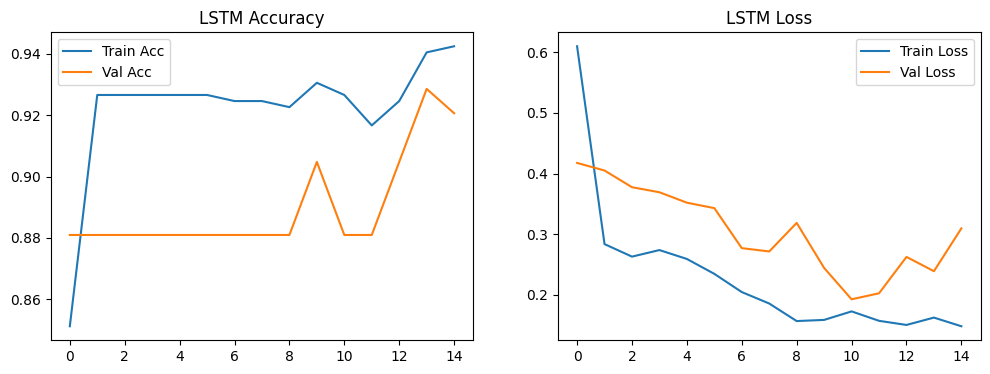

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
              precision    recall  f1-score   support

     Healthy       0.92      1.00      0.96       111
     Seizure       1.00      0.33      0.50        15

    accuracy                           0.92       126
   macro avg       0.96      0.67      0.73       126
weighted avg       0.93      0.92      0.90       126



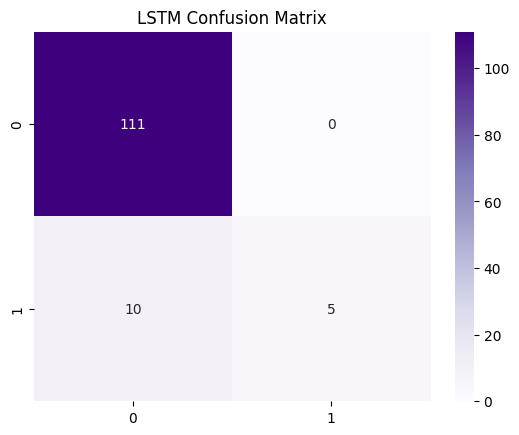


🏥 PHASE 5: BLIND PATIENT TEST (chb10_12.edf)...


/tmp/ipython-input-2847895642.py:200: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(test_file, preload=True, verbose=False)


🔎 Scanning 1800 windows...

📄 FINAL CLINICAL REPORT (LSTM):
✅ Accuracy on New Patient: 89.33%
              precision    recall  f1-score   support

     Healthy       1.00      0.90      0.94      1791
     Seizure       0.02      0.33      0.03         9

    accuracy                           0.89      1800
   macro avg       0.51      0.61      0.49      1800
weighted avg       0.99      0.89      0.94      1800


🔎 PICKING A RANDOM WINDOW TO VISUALIZE...


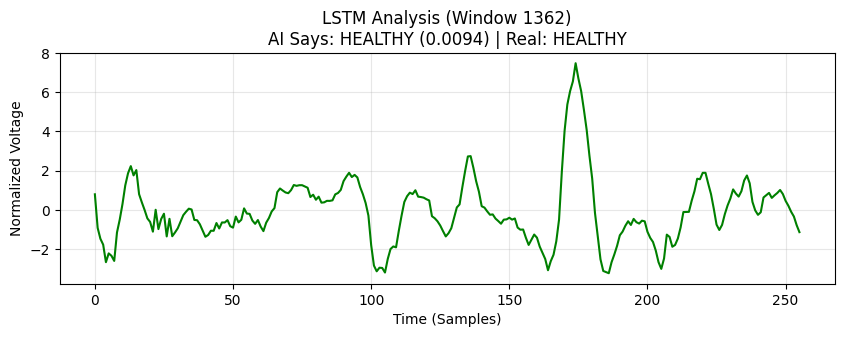

🎉 SUCCESS: LSTM correctly identified the signal.


In [ ]:
# ==========================================
# 🧠 GRANDMASTER SCRIPT: LSTM SEIZURE DETECTION
# ==========================================
import os
import sys

# 1. INSTALL MNE
print("🛠️ Installing MNE...")
!pip install -q mne

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mne
from scipy import signal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2. CONFIGURATION
WORK_DIR = "/kaggle/working"
EDF_FOLDER = os.path.join(WORK_DIR, "raw_data_lstm")
WINDOW_SECONDS = 4
ORIGINAL_FS = 256
TARGET_FS = 64  # Downsample to 64Hz (Makes LSTM faster & more accurate)
POINTS_PER_WINDOW = WINDOW_SECONDS * TARGET_FS  # 4 * 64 = 256 points

# ==========================================
# PHASE 1: ROBUST DATA DOWNLOAD
# ==========================================
print("\n⬇️ PHASE 1: DOWNLOADING DATA...")
os.makedirs(EDF_FOLDER, exist_ok=True)

files_to_download = [
    "chb01/chb01_03.edf",
    "chb01/chb01_04.edf",
    "chb02/chb02_16.edf",
    "chb03/chb03_01.edf"
]
base_url = "https://physionet.org/files/chbmit/1.0.0/"

for f in files_to_download:
    filename = os.path.basename(f)
    local_path = os.path.join(EDF_FOLDER, filename)

    if not os.path.exists(local_path) or os.path.getsize(local_path) < 1000000:
        print(f"   Downloading {filename}...")
        os.system(f"curl -L -o {local_path} {base_url}{f}")

SEIZURE_TIMES = {
    "chb01_03.edf": [(2996, 3036)],
    "chb01_04.edf": [(1467, 1494)],
    "chb02_16.edf": [(130, 212), (2972, 3053)],
    "chb03_01.edf": [(362, 414)]
}

# ==========================================
# PHASE 2: PREPARING SEQUENCES (NOT IMAGES)
# ==========================================
print("\n🚀 PHASE 2: EXTRACTING RAW SEQUENCES...")

X_data = []
y_data = []

files = [f for f in os.listdir(EDF_FOLDER) if f.endswith('.edf')]

for file_name in files:
    print(f"  Processing {file_name}...")
    try:
        # Load Raw Data
        raw = mne.io.read_raw_edf(os.path.join(EDF_FOLDER, file_name), preload=True, verbose=False)

        # PRE-PROCESSING FOR LSTM
        # 1. Resample: Shrink 256Hz -> 64Hz (Crucial for LSTM speed)
        raw.resample(TARGET_FS, verbose=False)
        # 2. Filter: Keep standard brain frequencies
        raw.filter(1., 30., verbose=False) # LSTMs prefer cleaner "low" freq data (1-30Hz)

        # Get data (Channel 0 only for simplicity)
        data = raw.get_data()[0] * 1e6 # Convert to uV

        n_windows = len(data) // POINTS_PER_WINDOW
        file_seizures = SEIZURE_TIMES.get(file_name, [])

        saved_count = 0
        for i in range(n_windows):
            start = i * POINTS_PER_WINDOW
            end = start + POINTS_PER_WINDOW
            mid_sec = (start + end) / 2 / TARGET_FS

            # Labeling
            is_seizure = 0
            for (s_start, s_end) in file_seizures:
                if s_start <= mid_sec <= s_end:
                    is_seizure = 1
                    break

            # BALANCE LOGIC:
            # Keep ALL Seizures, Keep Healthy every 5th window
            if is_seizure == 1 or (i % 5 == 0):
                window_data = data[start:end]
                if len(window_data) == POINTS_PER_WINDOW:
                    X_data.append(window_data)
                    y_data.append(is_seizure)
                    saved_count += 1

        print(f"     -> Extracted {saved_count} sequences.")

    except Exception as e:
        print(f"   ⚠️ SKIPPING {file_name}: {e}")
        continue

# Convert to Numpy Arrays
X = np.array(X_data)
y = np.array(y_data)

# Normalize (LSTMs hate big numbers like 1000uV, they want 0-1 or -1 to 1)
scaler = StandardScaler()
X = scaler.fit_transform(X) # Standardize data

# Reshape for LSTM: (Samples, TimeSteps, Features)
# We have 1 feature (Voltage)
X = X.reshape((X.shape[0], X.shape[1], 1))

print(f"\n📊 DATA READY: {X.shape}")
print(f"   Seizure Samples: {np.sum(y==1)}")
print(f"   Healthy Samples: {np.sum(y==0)}")

if len(X) == 0:
    print("❌ STOPPING: No data generated.")
else:
    # Split Train/Test
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

    # ==========================================
    # PHASE 3: TRAINING LSTM MODEL
    # ==========================================
    print("\n🧠 PHASE 3: TRAINING LSTM NETWORK...")

    model = Sequential([
        Input(shape=(POINTS_PER_WINDOW, 1)),

        # Bidirectional LSTM: Reads time forwards AND backwards
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.3),

        LSTM(32), # Summarize the sequence
        Dropout(0.3),

        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid') # Output: 0 or 1
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=32)
    model.save("lstm_seizure_model.h5")
    print("✅ Model Saved.")

    # ==========================================
    # PHASE 4: VISUALIZATION & REPORTS
    # ==========================================
    print("\n📈 GENERATING GRAPHS...")

    # 1. Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('LSTM Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('LSTM Loss')
    plt.legend()
    plt.show()

    # 2. Confusion Matrix
    preds = (model.predict(X_val) > 0.5).astype(int)
    print(classification_report(y_val, preds, target_names=['Healthy', 'Seizure']))

    sns.heatmap(confusion_matrix(y_val, preds), annot=True, fmt='d', cmap='Purples')
    plt.title('LSTM Confusion Matrix')
    plt.show()

    # ==========================================
    # PHASE 5: BLIND PATIENT TEST
    # ==========================================
    print("\n🏥 PHASE 5: BLIND PATIENT TEST (chb10_12.edf)...")
    test_file = os.path.join(WORK_DIR, "chb10_12.edf")
    os.system(f"curl -L -o {test_file} https://physionet.org/files/chbmit/1.0.0/chb10/chb10_12.edf")

    try:
        raw = mne.io.read_raw_edf(test_file, preload=True, verbose=False)
        raw.resample(TARGET_FS, verbose=False) # Must match training FS!
        raw.filter(1., 30., verbose=False)
        data = raw.get_data()[0] * 1e6

        predictions = []
        ground_truth = []
        REAL_SEIZURE_START = 6313
        REAL_SEIZURE_END = 6348

        # Prepare Blind Data
        X_blind = []
        timestamps = []

        n_windows = len(data) // POINTS_PER_WINDOW
        print(f"🔎 Scanning {n_windows} windows...")

        for i in range(n_windows):
            start = i * POINTS_PER_WINDOW
            end = start + POINTS_PER_WINDOW
            segment = data[start:end]
            X_blind.append(segment)
            timestamps.append(i) # Keep track of index

            # Ground Truth
            mid_sec = (start + end) / 2 / TARGET_FS
            if REAL_SEIZURE_START <= mid_sec <= REAL_SEIZURE_END:
                ground_truth.append(1)
            else:
                ground_truth.append(0)

        # Normalize Blind Data using same Scaler
        X_blind = np.array(X_blind)
        X_blind = scaler.transform(X_blind)
        X_blind = X_blind.reshape((X_blind.shape[0], X_blind.shape[1], 1))

        # Predict All at Once (Faster)
        preds_prob = model.predict(X_blind, verbose=0)
        predictions = (preds_prob > 0.5).astype(int).flatten()

        print("\n📄 FINAL CLINICAL REPORT (LSTM):")
        print(f"✅ Accuracy on New Patient: {accuracy_score(ground_truth, predictions)*100:.2f}%")
        print(classification_report(ground_truth, predictions, target_names=['Healthy', 'Seizure']))

        # ==========================================
        # 🖼️ FINAL BLOCK: VISUAL "WAVEFORM" TEST
        # ==========================================
        print("\n🔎 PICKING A RANDOM WINDOW TO VISUALIZE...")
        import random

        # Pick a random index
        idx = random.randint(0, len(X_blind)-1)

        # Get Data
        wave = X_blind[idx].flatten() # The numbers
        true_label = "SEIZURE" if ground_truth[idx] == 1 else "HEALTHY"
        pred_label = "SEIZURE" if predictions[idx] == 1 else "HEALTHY"
        conf = preds_prob[idx][0]

        # Plot
        plt.figure(figsize=(10, 3))
        plt.plot(wave, color='purple' if pred_label == "SEIZURE" else 'green')
        plt.title(f"LSTM Analysis (Window {idx})\nAI Says: {pred_label} ({conf:.4f}) | Real: {true_label}")
        plt.xlabel("Time (Samples)")
        plt.ylabel("Normalized Voltage")
        plt.grid(True, alpha=0.3)
        plt.show()

        if pred_label == true_label:
            print("🎉 SUCCESS: LSTM correctly identified the signal.")
        else:
            print("⚠️ FAILURE: LSTM misclassified this signal.")

    except Exception as e:
        print(f"❌ Error during testing: {e}")